# Melanoma Cancer ⚕:
### What is Melanoma?
Melanoma is a type of skin cancer that originates in the pigment-producing cells known as melanocytes. These cells are responsible for producing melanin, the pigment that gives color to the skin, hair, and eyes.

### Risk Factors:

* Excessive Sun Exposure: Exposure to ultraviolet (UV) rays from the sun is a primary risk factor.
* Fair Skin: People with fair skin, light hair, and light eyes are at a higher risk.
* Family History: A family history of melanoma can increase the risk.
* Weakened Immune System: Individuals with weakened immune systems are more susceptible.
### Detection and Diagnosis:

* Visual Inspection: Dermatologists often use the ABCDE rule (Asymmetry, Border irregularity, Color variation, Diameter, Evolution) for early detection.
* Biopsy: A biopsy is the definitive diagnostic method, involving the removal of a sample for examination.
### Importance of Early Detection:
Early detection is crucial for successful treatment. If melanoma is identified and treated in its early stages, the chances of cure are significantly higher.

dataset : [Kaggle](https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset)

## About the dataset:
this dataset empowers researchers and practitioners to develop robust machine-learning models capable of distinguishing between benign and malignant lesions. The images, uniformly sized at 224 x 224 pixels, offer a comprehensive view of melanoma's diverse manifestations.


## 0. Unziping Data

In [1]:
!unzip data.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/Malignant/1530.jpg  
  inflating: /content/train/Malignant/1531.jpg  
  inflating: /content/train/Malignant/1532.jpg  
  inflating: /content/train/Malignant/1533.jpg  
  inflating: /content/train/Malignant/1534.jpg  
  inflating: /content/train/Malignant/1535.jpg  
  inflating: /content/train/Malignant/1536.jpg  
  inflating: /content/train/Malignant/1537.jpg  
  inflating: /content/train/Malignant/1538.jpg  
  inflating: /content/train/Malignant/1539.jpg  
  inflating: /content/train/Malignant/154.jpg  
  inflating: /content/train/Malignant/1540.jpg  
  inflating: /content/train/Malignant/1541.jpg  
  inflating: /content/train/Malignant/1542.jpg  
  inflating: /content/train/Malignant/1543.jpg  
  inflating: /content/train/Malignant/1544.jpg  
  inflating: /content/train/Malignant/1545.jpg  
  inflating: /content/train/Malignant/1546.jpg  
  inflating: /content/train/Malignant/1547.jpg  
  inflating: /conte

## 1. Imporing Libraries

In [2]:
import tensorflow as tf
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt

## 2. Data Preprocessing and Data Augmentation

In [3]:
target_size = (224, 224)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest'
)

train_set = train_datagen.flow_from_directory('/content/train',
                                              target_size=target_size,
                                              batch_size=32,
                                              class_mode='binary')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size=target_size,
                                            batch_size=32,
                                            class_mode='binary')

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## 3. Exploratory Data Analysis (EDA)

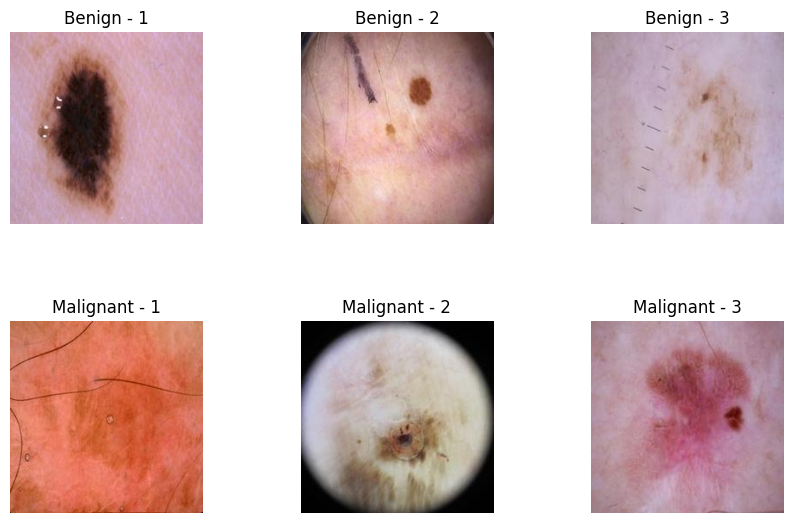

In [4]:
dataset_path = Path("/content/train")
categories = ["Benign", "Malignant"]

plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, category in enumerate(categories):
    category_path = dataset_path / category
    images = list(category_path.glob("*"))
    random_images = random.sample(images, min(3, len(images)))

    for j, image_path in enumerate(random_images, 1):
        img = plt.imread(image_path)

        plt.subplot(3, 3, i * 3 + j)
        plt.imshow(img)
        plt.title(f"{category} - {j}")
        plt.axis("off")

plt.show()

## 4. Building the CNN Architecture

In [5]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu, input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

## 5. Compile the model

In [6]:
cnn.compile(loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['accuracy'])

## 6. Fit the model

In [7]:
cnn.fit(train_set,
        validation_data=test_set,
        epochs=30)

Epoch 1/30
372/372 [==============================] - 165s 416ms/step - loss: 0.8479 - accuracy: 0.7247 - val_loss: 0.6598 - val_accuracy: 0.7635
Epoch 2/30
372/372 [==============================] - 155s 415ms/step - loss: 0.5692 - accuracy: 0.8018 - val_loss: 0.4805 - val_accuracy: 0.8390
Epoch 3/30
372/372 [==============================] - 156s 418ms/step - loss: 0.5173 - accuracy: 0.8121 - val_loss: 0.5753 - val_accuracy: 0.7660
Epoch 4/30
372/372 [==============================] - 154s 413ms/step - loss: 0.4753 - accuracy: 0.8182 - val_loss: 0.4656 - val_accuracy: 0.8115
Epoch 5/30
372/372 [==============================] - 155s 416ms/step - loss: 0.4566 - accuracy: 0.8266 - val_loss: 0.3821 - val_accuracy: 0.8585
Epoch 6/30
372/372 [==============================] - 155s 416ms/step - loss: 0.4417 - accuracy: 0.8265 - val_loss: 0.4704 - val_accuracy: 0.8175
Epoch 7/30
372/372 [==============================] - 156s 418ms/step - loss: 0.4379 - accuracy: 0.8278 - val_loss: 0.4089 -

## 7. Using our model to predict

In [ ]:
test_dataset_path = Path("/content/test")
categories = ["Benign", "Malignant"]

plt.figure(figsize=(10, 7))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.figure(figsize=(10, 7))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, category in enumerate(categories):
    category_path = test_dataset_path / category
    images = list(category_path.glob("*"))
    random_images = random.sample(images, min(3, len(images)))

    for j, image_path in enumerate(random_images, 1):
        img = plt.imread(image_path)
        img = np.expand_dims(img, axis=0)

        prediction = cnn.predict(img)
        predicted_class = np.argmax(prediction)

        color = "green" if categories[predicted_class] == category else "red"

        plt.subplot(2, 3, i * 3 + j)
        plt.imshow(img.squeeze())
        plt.title(f"Actual: {category}\nPredicted: {categories[predicted_class]}", color=color)
        plt.axis("off")

plt.show()